## Name: George Daramola
### Stats and Public Health Part 1 Deliverable

In [142]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
#import sklearn as sk

In [200]:
import os 
print(os.getcwd())

/Users/georgedaramola/Documents/Unit_2/Assignment_4


In [201]:
# Setting globally figure size in the notebook
plt.rcParams["figure.figsize"] = (8.0, 6.0)

## Part 1 - Basic Data Wrangling

In [202]:
#reading CSV file
mosquito_df = pd.read_csv('/Users/georgedaramola/Documents/Unit_2/Assignment_4/mosquito_data.csv')

In [203]:
#sneak peak into data 
mosquito_df.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [230]:
#data types for variables 
mosquito_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Block            18495 non-null  int64         
 4   Trap             18495 non-null  object        
 5   Trap type        18495 non-null  object        
 6   Date             18495 non-null  datetime64[ns]
 7   Mosquito number  18495 non-null  int64         
 8   Mosquito ID      18495 non-null  object        
 9   WNV Present      18495 non-null  object        
 10  Species          18495 non-null  object        
 11  Lat              15571 non-null  float64       
 12  Lon              15571 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.8+ MB


1. What is the shape of the dataframe?
   ##### The shape of dataframe is (18495, 13) (13 columns(variables) and 18,495 rows (observations)

In [229]:
#shape of dataframe (13 columns(variables) and 18,495 rows (observations)

mosquito_df.shape

(18495, 13)

2. Convert the 'Date' column to have a datetime format.


In [258]:
#using pandas datetime function to convert date as string to datatime format
mosquito_df['Date'] = pd.to_datetime(mosquito_df['Date'], format="%Y-%m-%d %H:%M:%S")  
mosquito_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Block            18495 non-null  int64         
 4   Trap             18495 non-null  object        
 5   Trap type        18495 non-null  object        
 6   Date             18495 non-null  datetime64[ns]
 7   Mosquito number  18495 non-null  int64         
 8   Mosquito ID      18495 non-null  object        
 9   WNV Present      18495 non-null  object        
 10  Species          18495 non-null  object        
 11  Lat              15571 non-null  float64       
 12  Lon              15571 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.8+ MB


In [255]:
mosquito_df.describe()

,Year,Week,Block,Date,Mosquito number,Lat,Lon
count,18495.000000,18495.000000,18495.000000,18495,18495.000000,15571.000000,15571.000000
mean,2012.905812,31.004001,54.314788,2013-06-30 17:40:04.100135424,10.879913,41.839963,-87.691642
min,2007.000000,20.000000,1.000000,2007-05-29 00:05:00,1.000000,41.644720,-87.854473
25%,2010.000000,28.000000,22.000000,2010-07-16 00:07:00,2.000000,41.742670,-87.747459
50%,2013.000000,31.000000,51.000000,2013-08-22 00:08:00,5.000000,41.845715,-87.691698
75%,2016.000000,34.000000,89.000000,2016-08-11 00:08:00,14.000000,41.945961,-87.637873
max,2019.000000,40.000000,132.000000,2019-09-26 00:09:00,50.000000,42.017801,-87.531051
std,3.725857,4.332020,36.712796,NaN,13.475066,0.111374,0.076545


3. Pick two numeric and two categorical columns:

   What data are they storing?
   
   ##### There are two numeric variables: Block and Mosquito number.
   
   ##### Block stores the block number corresponding to the address or location of the traps. Since Block acts as an identifier, it can also be treated as a categorical variable. Mosquito number represents the number of mosquitoes caught in each trap.

   ##### There are also two categorical variables: Mosquito ID and Species.

   ##### Mosquito ID serves as a unique identifier for each mosquito sample. Species stores the description of the mosquito species.

   How are they distributed?

   ##### Block appears to follow a roughly uniform distribution, with a noticeable peak at Block 100. Mosquito number shows a right-skewed distribution, which likely occurs because most traps contain only a small number of mosquitoes.
   
   ##### Mosquito ID and Species have similar distributions, as both describe the species captured in each trap. From the data, the most frequently occurring species is Culex Restuans, while the least frequent is Culex Salinarius.


In [259]:
numeric= mosquito_df[['Block','Mosquito number']] #numerical variables 
cate= mosquito_df[['Mosquito ID','Species']] #categorical variables 

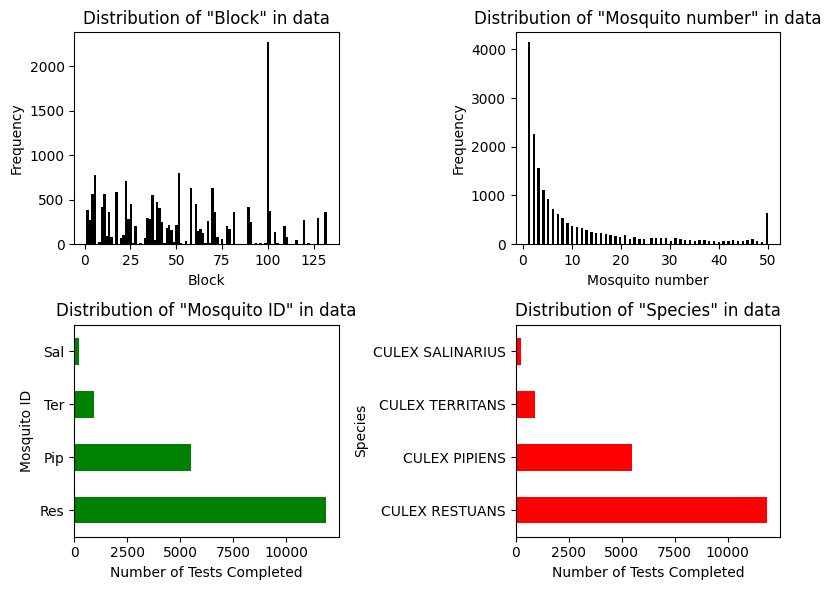

In [260]:
#plt.figure(figsize=(8, 6))

plt.subplots(2,2)

plt.subplot(2,2,1)
plt.hist(mosquito_df['Block'], bins=100, color ='black') #Block number of address of location of trap 
plt.title('Distribution of "Block" in data')
plt.ylabel('Frequency')
plt.xlabel('Block')

plt.subplot(2,2,2)
plt.hist(mosquito_df['Mosquito number'], bins=100, color ='black') #Number of mosquitoes caught in this trap
plt.title('Distribution of "Mosquito number" in data')
plt.ylabel('Frequency')
plt.xlabel('Mosquito number')

plt.subplot(2,2,3)
mosquito_df['Mosquito ID'].value_counts().plot(kind="barh", color = 'green')
#plt.hist(mosquito_df['Mosquito ID'], bins=100) #Id for Mosquito species
plt.title('Distribution of "Mosquito ID" in data')
plt.ylabel('Mosquito ID')
plt.xlabel('Number of Tests Completed')

plt.subplot(2,2,4)
mosquito_df['Species'].value_counts().plot(kind="barh", color = 'red')
#plt.hist(mosquito_df['Species'], bins=100) # Mosquito species
plt.title('Distribution of "Species" in data')
plt.ylabel('Species')
plt.xlabel('Number of Tests Completed')

plt.tight_layout()

plt.show()

4. Are there any columns that contain duplicate information? If so, remove the redundant columns.

   #### Notes:
   Yes there are 658 duplicates in the data, and we will remove the redundant "rows"/observations. 

In [280]:
#getting the duplicates in the data, as there is no unique ID, I have used date and time as the unique ID as trap experiments are performed based on date and time 
#there are 658 duplicates in the data 
print(f"There are {mosquito_df.duplicated().sum()} duplicates in the data")
#sneak peak into duplicates 
mosquito_df[mosquito_df.duplicated(keep=False)].sort_values('Date')

There are 658 duplicates in the data


,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
17733,2007,28,4XX W 127TH,4,T135,CDC,2007-08-01 02:08:34,10,Pip,positive,CULEX PIPIENS,NaN,NaN
14942,2007,28,4XX W 127TH,4,T135,CDC,2007-08-01 02:08:34,10,Pip,positive,CULEX PIPIENS,NaN,NaN
17486,2007,28,4XX W 127TH,4,T135,CDC,2007-08-01 02:08:34,10,Pip,positive,CULEX PIPIENS,NaN,NaN
17613,2007,28,4XX W 127TH,4,T135,CDC,2007-08-01 02:08:34,10,Pip,positive,CULEX PIPIENS,NaN,NaN
14703,2007,31,65XX N OAK PARK AVE,65,T143,GRAVID,2007-08-07 00:08:00,29,Pip,positive,CULEX PIPIENS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15760,2019,34,100XX W OHARE AIRPORT,100,T901,GRAVID,2019-08-22 00:08:00,16,Res,positive,CULEX RESTUANS,NaN,NaN
18239,2019,34,100XX W OHARE AIRPORT,100,T901,GRAVID,2019-08-22 00:08:00,16,Res,positive,CULEX RESTUANS,NaN,NaN
17206,2019,35,100XX W OHARE AIRPORT,100,T913,GRAVID,2019-08-29 00:08:00,3,Res,positive,CULEX RESTUANS,NaN,NaN
16769,2019,35,100XX W OHARE AIRPORT,100,T913,GRAVID,2019-08-29 00:08:00,3,Res,positive,CULEX RESTUANS,NaN,NaN


In [283]:
#dropping the 658 duplicates in place
mosquito_df.drop_duplicates(inplace=True) 

In [284]:
#data info after dropping duplicates
mosquito_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17837 entries, 0 to 18493
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             17837 non-null  int64         
 1   Week             17837 non-null  int64         
 2   Address Block    17837 non-null  object        
 3   Block            17837 non-null  int64         
 4   Trap             17837 non-null  object        
 5   Trap type        17837 non-null  object        
 6   Date             17837 non-null  datetime64[ns]
 7   Mosquito number  17837 non-null  int64         
 8   Mosquito ID      17837 non-null  object        
 9   WNV Present      17837 non-null  object        
 10  Species          17837 non-null  object        
 11  Lat              15571 non-null  float64       
 12  Lon              15571 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.9+ MB


5. Are there any null values in the dataframe? If so, deal with them appropriately.

####  Notes: 
   After removing duplicates, there 2266 null values each located in the Latitude and Longitude columns. As the data represents
   data from one state, it is safe to assume that the median Longitude and Latitude can be used as replacement for the null values. 

In [287]:
#check to see if they are any null values 
mosquito_df.isnull().sum()

Year               0
Week               0
Address Block      0
Block              0
Trap               0
Trap type          0
Date               0
Mosquito number    0
Mosquito ID        0
WNV Present        0
Species            0
Lat                0
Lon                0
dtype: int64

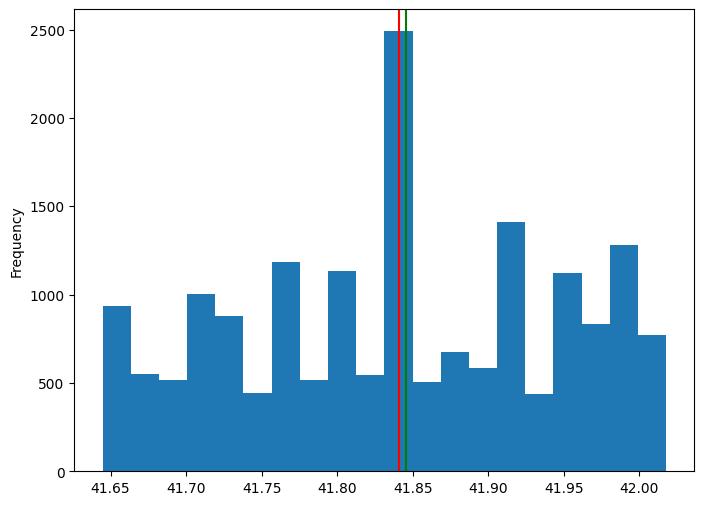

In [288]:
#checking distribution of Latitude and Longitude as they are the variables with the null values 
mosquito_df['Lat'].plot(kind='hist', bins=20)
plt.axvline(mosquito_df['Lat'].mean(), color='red')
plt.axvline(mosquito_df['Lat'].median(), color='green')
plt.show()

In [289]:
#assign median to the missing/null values of Longitude and Latitude 
mosquito_df['Lat']= mosquito_df['Lat'].fillna(mosquito_df.Lat.median())# using the median for null values
mosquito_df['Lon']= mosquito_df['Lon'].fillna(mosquito_df.Lon.median()) # using the median for null values
assert mosquito_df['Lat'].isna().sum != 0
assert mosquito_df['Lon'].isna().sum != 0
mosquito_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17837 entries, 0 to 18493
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             17837 non-null  int64         
 1   Week             17837 non-null  int64         
 2   Address Block    17837 non-null  object        
 3   Block            17837 non-null  int64         
 4   Trap             17837 non-null  object        
 5   Trap type        17837 non-null  object        
 6   Date             17837 non-null  datetime64[ns]
 7   Mosquito number  17837 non-null  int64         
 8   Mosquito ID      17837 non-null  object        
 9   WNV Present      17837 non-null  object        
 10  Species          17837 non-null  object        
 11  Lat              17837 non-null  float64       
 12  Lon              17837 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.9+ MB


## Part 2 - Basic EDA

1. Using an appropriate visual, or visuals, explore the relationship between mosquito number and date.

#### Findings:

From the scatter plot, we can see that data was collected from 2007 to 2019. The number of mosquitoes collected in each measurement was capped at 50. Because the scatter plot shows no clear pattern or trend, it is difficult to draw any inferences from it.

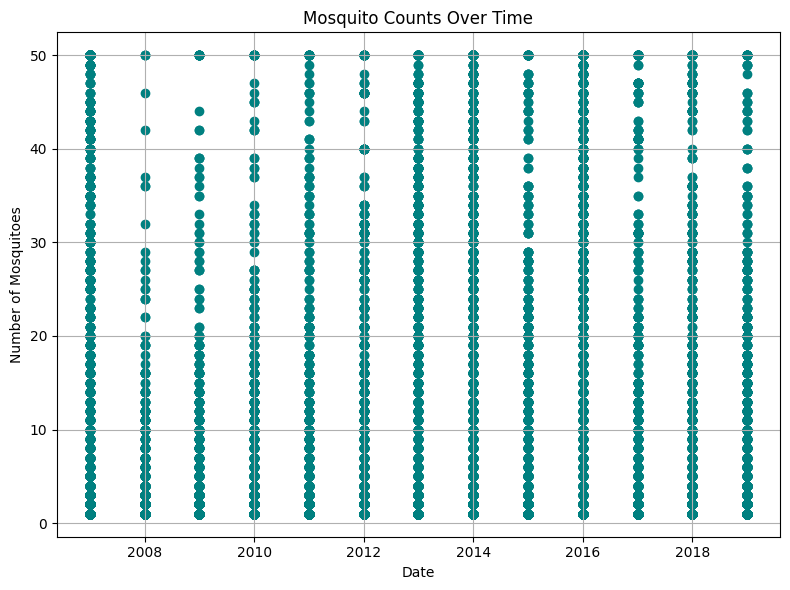

In [305]:
#scatter plot of number of mosquitoes and date of measurement.
plt.figure(figsize=(8, 6))
plt.scatter(mosquito_df['Year'], mosquito_df['Mosquito number'], color='teal', linewidth=1)

plt.xlabel('Date')
plt.ylabel('Number of Mosquitoes')
plt.title('Mosquito Counts Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

## Part 3 - Advanced EDA

Using an appropriate visual, explore the relationship between mosquito species and WNV prevalence.

#### Findings:

We used a side-by-side bar chart to explore the relationship between mosquito species and the prevalence of the West Nile virus (WNV) among those species. The Culex Restuans species was the most prevalent in the dataset, while Culex Salinarius was the least common. Overall, the presence of WNV across all species was relatively low compared to the total number of samples collected. Culex Restuans had approximately 2,078 samples testing positive for WNV, while Culex Pipiens had about 1,237 positive samples. The other two species showed even lower WNV occurrence. From the side-by-side bar chart, we can also observe that Culex Pipiens had a higher proportion of positive WNV cases compared to Culex Restuans, even though Culex Restuans had a larger total sample size.

In [306]:
#Creating a binary variable, WNV Present_Binary for the categorical variable WNV Present, where negative = 0 and positive = 1
mosquito_df['WNV Present_Binary']=np.where(mosquito_df['WNV Present']=='negative',0,1)

In [337]:
species_counts

WNV Present_Binary,0,1
Species,,
CULEX PIPIENS,4074,1237
CULEX RESTUANS,9309,2078
CULEX SALINARIUS,215,7
CULEX TERRITANS,903,14


In [336]:
present_WNV = species_counts[1]/(species_counts[0]+species_counts[1])
print(present_WNV)

Species
CULEX PIPIENS       0.232913
CULEX RESTUANS      0.182489
CULEX SALINARIUS    0.031532
CULEX TERRITANS     0.015267
dtype: float64


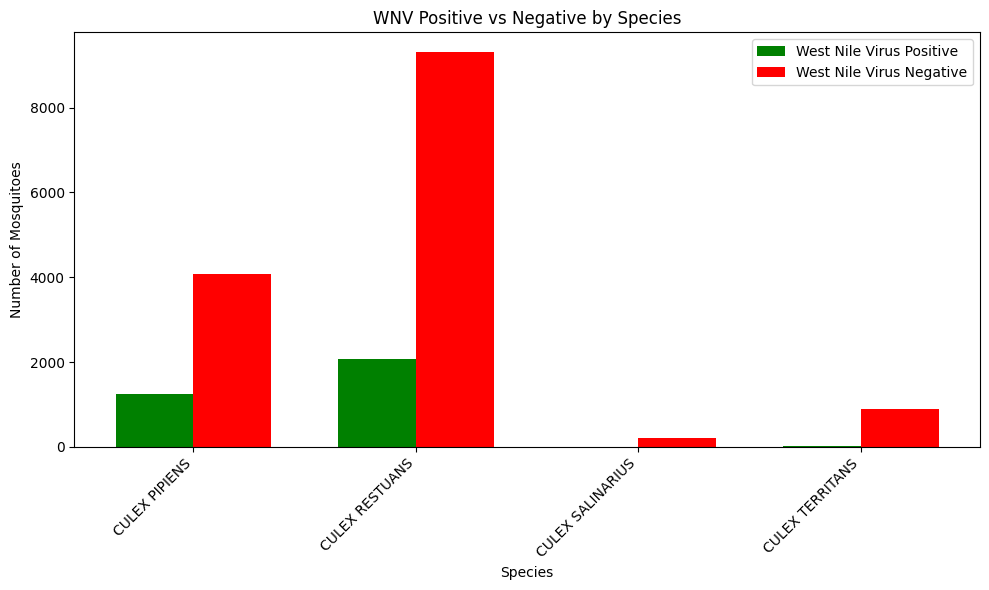

In [307]:
#Best way to explore the relationship between mosquito species and WNV prevalence is to use a side-by-side bar chart

#grouping each species count by if the have the west nile virus or not using the created binary 
species_counts = mosquito_df.groupby('Species')['WNV Present_Binary'].value_counts().unstack(fill_value=0)

# X-axis positions
species = species_counts.index
x = np.arange(len(species))  # label locations
width = 0.35 # width of bars

plt.figure(figsize=(10,6))

# Plot bars to create a side by side bar chart by finding midpoint 
plt.bar(x - width/2, species_counts[1], width, label='West Nile Virus Positive', color='green')
plt.bar(x + width/2, species_counts[0], width, label='West Nile Virus Negative', color='red')

# Labels and title
plt.xticks(x, species, rotation=45, ha='right')
plt.ylabel('Number of Mosquitoes')
plt.xlabel('Species')
plt.title('WNV Positive vs Negative by Species')
plt.legend()
plt.tight_layout()
plt.show()

Using an appropriate visual, explore the relationship between the number of mosquitos caught and trap type.
Note: This visual should be a different type of visualization than the previous one

#### Findings: 
The GRAVID trap has a smallest distribution on the number of mosquitoes compared to the SENTINEL and CDC traps. The SENTINEL  and CDC trap have larger distributions of mosquitoes the median of number of mosquitoes captured by the CDC is lower compared to that of the SENTINEL traps. The OVI traps are unreadable as they have little to no effect in capturing mosquitoes 

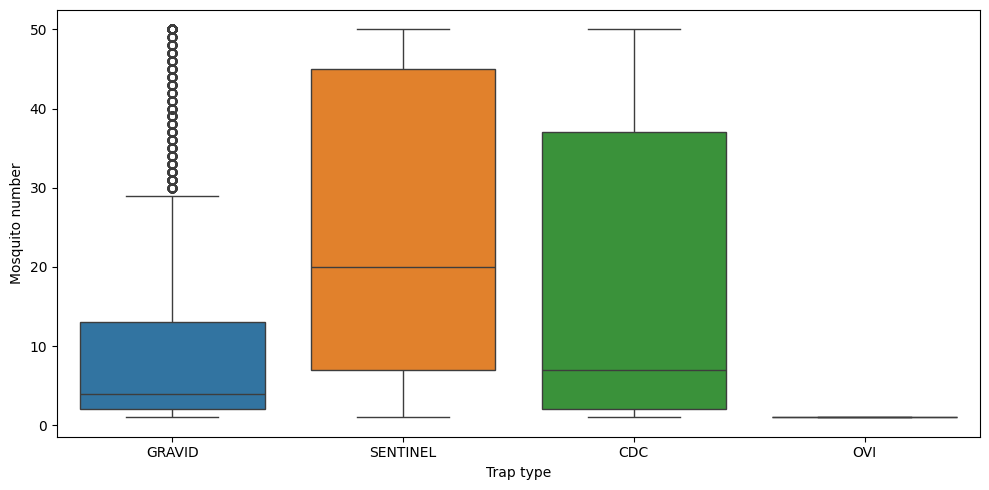

In [195]:
#mosquito_df.info()
plt.figure(figsize=(10,5))
sns.boxplot(x='Trap type', y='Mosquito number', data =mosquito_df, hue='Trap type')
plt.tight_layout()
plt.show()

Using an appropriate visual, come up with an additional insight of your choice.
Note: This visual should be a different type of visualization than the previous two

#### Findings: 
In the heatmap below that compares the type of species the different kind of trap types catch. The GRAVID trap seems like the most popular tray type used for this experiment and the they capture every kind of specie of mosquito. The OVI trap was the least popular trap type as it was used once through the whole measurement process from 2008 to 2019. 

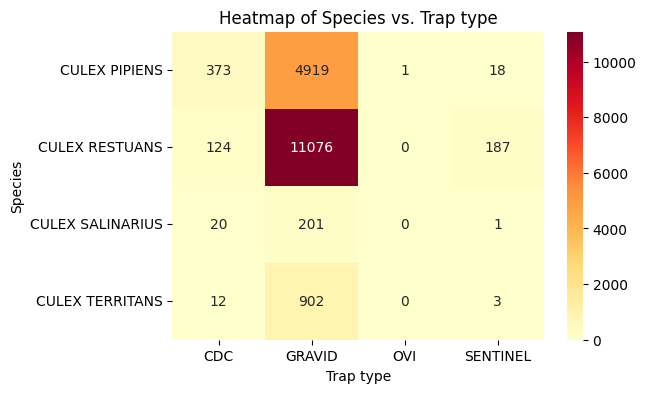

In [328]:
plt.figure(figsize=(6, 4))
heat_mix = pd.crosstab(mosquito_df['Species'], mosquito_df['Trap type'])
sns.heatmap(heat_mix, annot=True, fmt='d', cmap='YlOrRd')
plt.title("Heatmap of Species vs. Trap type")
plt.xlabel("Trap type")
plt.ylabel("Species")
plt.show()